In [1]:
# Multi-Agent Strategic Analysis System for Motel One Repositioning
# Using LangGraph's Supervisor Architecture with Question Decomposition Protocol

from IPython.display import Image, display, Markdown
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_tavily import TavilySearch
from pydantic import BaseModel
from dotenv import load_dotenv
import operator

load_dotenv()

True

# 🏨 Motel One Strategic Repositioning Agent System

## Master Context
**Brand:** MotelOne (Budget Design Hotel Chain)  
**Challenge:** Capture Gen-Z travel spend (35% of market by 2027) without alienating 90% Boomer/Gen-X base  
**Revenue at Stake:** €400M by 2028  
**Budget:** €8M over 18 months

## Agent Architecture
This system implements the **Question Decomposition Protocol** using specialized agents:
1. **Research Agent** - Gathers market data, trends, and competitor analysis
2. **Stakeholder Analyst** - Analyzes implicit needs and stakeholder perspectives  
3. **Strategy Agent** - Identifies tactical traps and strategic opportunities
4. **Supervisor** - Orchestrates the workflow and synthesizes final output

In [2]:
# Define the shared state for our multi-agent system
class AgentState(TypedDict):
    """State shared across all agents in the system"""
    messages: Annotated[list, add_messages]
    research_data: str  # Market research findings
    stakeholder_analysis: str  # Stakeholder insights
    strategic_angles: str  # Generated strategies
    current_phase: str  # Current phase of Question Decomposition Protocol
    next_agent: str  # Which agent should process next

## 🔧 Define Research Tools
Tools for gathering market intelligence, trends, and competitor data

In [4]:
# Research Tools for Market Intelligence

def search_market_trends(query: str) -> str:
    """
    Search for current market trends, Gen-Z travel behaviors, and hotel industry insights.
    Use this for understanding market dynamics and consumer behavior patterns.
    """
    search = TavilySearch(max_results=3, topic="general", include_answer=True)
    result = search.invoke({"query": query})
    return result.get('answer', str(result))

def search_competitor_analysis(query: str) -> str:
    """
    Search for competitor strategies, positioning, and brand perception data.
    Use this for understanding competitive landscape and successful repositioning cases.
    """
    search = TavilySearch(max_results=3, topic="news", include_answer=True)
    result = search.invoke({"query": query})
    return result.get('answer', str(result))

def search_demographic_insights(query: str) -> str:
    """
    Search for demographic-specific insights about Gen-Z and Boomer preferences.
    Use this for understanding generational differences in travel and hospitality.
    """
    search = TavilySearch(max_results=3, topic="general", include_answer=True)
    result = search.invoke({"query": query})
    return result.get('answer', str(result))

## 🤖 Define Specialized Agents
Each agent has a specific role in the Question Decomposition Protocol

In [5]:
# Initialize LLMs for different agents
llm = ChatOpenAI(temperature=0.3, model="gpt-4o-mini")
strategic_llm = ChatOpenAI(temperature=0.7, model="gpt-4o-mini")  # Higher creativity for strategy

In [6]:
# Agent System Prompts

RESEARCH_AGENT_PROMPT = """You are a Market Research Specialist for a strategic consulting agency.
Your role is to gather comprehensive market intelligence for the Motel One repositioning challenge.

CONTEXT:
- Motel One is a Budget Design Hotel Chain
- Current loyalty base: 90% Gen-X/Boomers
- Gen-Z share: Only 3% of bookings
- Target: Capture Gen-Z travel spend (35% of market by 2027)
- Revenue at stake: €400M by 2028

YOUR RESEARCH FOCUS:
1. Gen-Z travel preferences and booking behaviors
2. Hotel industry trends and successful repositioning cases
3. Generational differences in hospitality expectations
4. Competitor strategies targeting multiple demographics
5. Digital transformation in budget hospitality

Use the available search tools to gather real, current data. Be thorough and cite specific findings.
Format your research in clear sections with key insights highlighted."""

STAKEHOLDER_AGENT_PROMPT = """You are a Stakeholder Analysis Expert implementing PHASE 1 of the Question Decomposition Protocol.

CONTEXT:
- Motel One needs to capture Gen-Z without alienating 90% Boomer/Gen-X base
- €400M revenue at stake by 2028
- Budget: €8M over 18 months

YOUR ANALYSIS MUST COVER:

**IMPLICIT NEED ANALYSIS:**
1. What is the actual business risk if we lose the Boomers?
2. Why is this a "product definition challenge" not just a marketing challenge?
3. What is the "non-invasive" way to signal relevance to Gen-Z?

**STAKEHOLDER MAPPING:**
1. INVESTORS: What are their true concerns? (quarterly stability vs. future growth)
2. LOYALIST GUESTS (Boomer/Gen-X): What specific things would alienate them?
3. SCEPTIC GUESTS (Gen-Z): What do they actually need vs. what we assume they want?

Be specific about the tensions between stakeholder groups and identify hidden conflicts."""

STRATEGY_AGENT_PROMPT = """You are a Lead Strategist at Laya Group (Serviceplan) implementing PHASE 2 & 3 of the Question Decomposition Protocol.

CONTEXT:
- Motel One: Budget Design Hotel Chain
- Challenge: Intergenerational Brand Gap
- Constraint: Cannot pivot to "Hostel vibes" or "Party Hotel"

YOUR STRATEGIC TASK:

**PHASE 2 - STRATEGIC ELEVATION:**
1. TACTICAL TRAP: Identify the obvious, lazy answer most agencies would pitch
   - Why would it fail? (cognitive dissonance, alienation risks)
   
2. STRATEGIC OPPORTUNITY: Find the shared value bridge
   - What values do Gen-Z and Boomers actually share?
   - How can we reframe the brand proposition to appeal to both?

**PHASE 3 - OUTPUT:**
Provide 3 DISTINCT strategic angles with:
- Creative concept name
- The core pitch (one powerful sentence)
- Gen-Z appeal (how it works for them)
- Boomer appeal (how it works for them)
- Implementation approach
- Risk assessment

Be bold, creative, and data-informed. Your strategies must be executable within €8M over 18 months."""

In [7]:
# Define tools for each agent
research_tools = [search_market_trends, search_competitor_analysis, search_demographic_insights]

# Bind tools to LLMs
research_llm_with_tools = llm.bind_tools(research_tools)

## 🔄 Define Agent Nodes
Each node represents a specialized agent in the workflow

In [ ]:
# Research Agent Node - conducts research using tools directly
def research_agent(state: AgentState) -> AgentState:
    """Agent that conducts market research using search tools directly"""
    print("🔍 Starting research phase...")
    
    # Conduct multiple searches directly
    research_results = []
    
    # Search 1: Gen-Z travel preferences
    try:
        result1 = search_market_trends("Gen Z travel preferences hotel booking 2024 2025 trends")
        research_results.append(f"GEN-Z TRAVEL TRENDS:\n{result1}")
        print("  ✓ Gen-Z travel trends gathered")
    except Exception as e:
        research_results.append(f"GEN-Z TRAVEL TRENDS: Research unavailable - {str(e)}")
    
    # Search 2: Budget hotel repositioning
    try:
        result2 = search_competitor_analysis("budget hotel brand repositioning case study successful")
        research_results.append(f"COMPETITOR REPOSITIONING CASES:\n{result2}")
        print("  ✓ Competitor analysis gathered")
    except Exception as e:
        research_results.append(f"COMPETITOR ANALYSIS: Research unavailable - {str(e)}")
    
    # Search 3: Generational preferences in hospitality
    try:
        result3 = search_demographic_insights("hotel preferences Boomers vs Gen Z generational differences hospitality")
        research_results.append(f"GENERATIONAL INSIGHTS:\n{result3}")
        print("  ✓ Generational insights gathered")
    except Exception as e:
        research_results.append(f"GENERATIONAL INSIGHTS: Research unavailable - {str(e)}")
    
    # Search 4: Hotel digital transformation
    try:
        result4 = search_market_trends("hotel digital transformation guest experience mobile check-in 2024")
        research_results.append(f"DIGITAL TRANSFORMATION TRENDS:\n{result4}")
        print("  ✓ Digital transformation trends gathered")
    except Exception as e:
        research_results.append(f"DIGITAL TRENDS: Research unavailable - {str(e)}")
    
    combined_research = "\n\n---\n\n".join(research_results)
    
    research_message = AIMessage(content=f"""
## Research Phase Complete

I have gathered the following market intelligence:

{combined_research}
""")
    
    return {
        "messages": [research_message],
        "current_phase": "research",
        "next_agent": "research_synthesizer"
    }

In [ ]:
# Helper function to extract content from messages (handling tool messages properly)
from langchain_core.messages import ToolMessage, AIMessage

def extract_research_content(messages: list) -> str:
    """Extract research content from messages, handling tool outputs properly"""
    content_parts = []
    for msg in messages:
        if isinstance(msg, ToolMessage):
            # Extract tool output content
            content_parts.append(f"Research Finding: {msg.content}")
        elif isinstance(msg, AIMessage) and msg.content:
            content_parts.append(msg.content)
        elif hasattr(msg, 'content') and msg.content and not hasattr(msg, 'tool_calls'):
            content_parts.append(msg.content)
    return "\n\n".join(content_parts)

# Research Synthesizer - processes tool outputs into structured research
def research_synthesizer(state: AgentState) -> AgentState:
    """Synthesizes research tool outputs into structured findings"""
    messages = state.get("messages", [])
    
    # Extract content from messages without passing raw tool messages to LLM
    research_content = extract_research_content(messages)
    
    synthesis_prompt = SystemMessage(content="""You are a research synthesizer. 
    Review the research gathered and create a comprehensive 
    MARKET INTELLIGENCE REPORT with these sections:
    
    1. GEN-Z TRAVEL INSIGHTS: Key behaviors, preferences, and expectations
    2. BOOMER/GEN-X INSIGHTS: What they value and what would alienate them
    3. COMPETITIVE LANDSCAPE: How others have solved similar challenges
    4. INDUSTRY TRENDS: Relevant hospitality and tech trends
    5. KEY OPPORTUNITIES: Specific actionable opportunities identified
    
    Be specific with data points and examples.""")
    
    synthesis_request = HumanMessage(content=f"""
    Here is the research data gathered:
    
    {research_content}
    
    Please synthesize this into a comprehensive Market Intelligence Report.
    """)
    
    response = llm.invoke([synthesis_prompt, synthesis_request])
    
    return {
        "messages": [response],
        "research_data": response.content,
        "current_phase": "research_complete",
        "next_agent": "stakeholder_analyst"
    }

In [10]:
# Stakeholder Analysis Agent Node
def stakeholder_analyst(state: AgentState) -> AgentState:
    """Agent that performs deep stakeholder analysis (Phase 1 of QDP)"""
    messages = state.get("messages", [])
    research_data = state.get("research_data", "")
    
    system_msg = SystemMessage(content=STAKEHOLDER_AGENT_PROMPT)
    
    analysis_request = HumanMessage(content=f"""
    Based on the following market research, conduct your stakeholder analysis:
    
    RESEARCH FINDINGS:
    {research_data}
    
    Now perform PHASE 1 of the Question Decomposition Protocol:
    1. Analyze the IMPLICIT NEEDS
    2. Map all STAKEHOLDERS and their hidden conflicts
    3. Identify the "Survival vs. Suicide Paradox" for this brand
    
    Be thorough and strategic in your analysis.
    """)
    
    response = llm.invoke([system_msg] + [analysis_request])
    
    return {
        "messages": [response],
        "stakeholder_analysis": response.content,
        "current_phase": "stakeholder_complete",
        "next_agent": "strategy_agent"
    }

In [11]:
# Strategy Agent Node
def strategy_agent(state: AgentState) -> AgentState:
    """Agent that generates strategic angles (Phase 2 & 3 of QDP)"""
    messages = state.get("messages", [])
    research_data = state.get("research_data", "")
    stakeholder_analysis = state.get("stakeholder_analysis", "")
    
    system_msg = SystemMessage(content=STRATEGY_AGENT_PROMPT)
    
    strategy_request = HumanMessage(content=f"""
    You have received the following inputs from your team:
    
    === MARKET RESEARCH ===
    {research_data}
    
    === STAKEHOLDER ANALYSIS ===
    {stakeholder_analysis}
    
    Now execute PHASE 2 (Strategic Elevation) and PHASE 3 (Output):
    
    1. First, identify the TACTICAL TRAP - what's the lazy answer?
    2. Then, identify the STRATEGIC OPPORTUNITY - what shared values can bridge the gap?
    3. Finally, provide 3 DISTINCT STRATEGIC ANGLES that solve the Intergenerational Brand Gap
    
    Each angle must be:
    - Bold and creative
    - Grounded in the research
    - Executable within €8M/18 months
    - Protective of the Boomer base while attracting Gen-Z
    """)
    
    response = strategic_llm.invoke([system_msg] + [strategy_request])
    
    return {
        "messages": [response],
        "strategic_angles": response.content,
        "current_phase": "strategy_complete",
        "next_agent": "supervisor"
    }

In [12]:
# Supervisor Agent - Orchestrates and synthesizes final output
def supervisor(state: AgentState) -> AgentState:
    """Supervisor that synthesizes all agent outputs into final deliverable"""
    research_data = state.get("research_data", "")
    stakeholder_analysis = state.get("stakeholder_analysis", "")
    strategic_angles = state.get("strategic_angles", "")
    
    supervisor_prompt = SystemMessage(content="""You are the Lead Strategist presenting the final 
    strategic recommendation to the Motel One executive team.
    
    Your presentation must be:
    1. Executive-ready (clear, concise, actionable)
    2. Data-backed (reference specific research findings)
    3. Risk-aware (acknowledge constraints and trade-offs)
    4. Compelling (make them want to act)
    
    Structure your final output as a STRATEGIC BRIEF with:
    - Executive Summary (3-4 sentences)
    - The Challenge Reframed
    - Key Insights from Research
    - Stakeholder Risk Matrix
    - The 3 Strategic Angles (with recommendation on which to prioritize)
    - Implementation Roadmap Overview
    - Success Metrics & KPIs
    """)
    
    synthesis_request = HumanMessage(content=f"""
    Synthesize all the work from your team into a final STRATEGIC BRIEF:
    
    === MARKET RESEARCH ===
    {research_data}
    
    === STAKEHOLDER ANALYSIS ===
    {stakeholder_analysis}
    
    === STRATEGIC ANGLES ===
    {strategic_angles}
    
    Create a compelling, executive-ready strategic brief that can be presented to 
    Motel One leadership. Be bold in your recommendation.
    """)
    
    response = strategic_llm.invoke([supervisor_prompt, synthesis_request])
    
    return {
        "messages": [response],
        "current_phase": "complete",
        "next_agent": "end"
    }

## 🔀 Define Routing Logic
Conditional edges to route between agents based on state

In [ ]:
# Simplified routing - no longer need complex tool routing
# Since research_agent calls tools directly

def should_continue(state: AgentState) -> Literal["stakeholder_analyst", "strategy_agent", "supervisor", "end"]:
    """Determine next agent based on current phase"""
    next_agent = state.get("next_agent", "end")
    
    if next_agent == "stakeholder_analyst":
        return "stakeholder_analyst"
    elif next_agent == "strategy_agent":
        return "strategy_agent"
    elif next_agent == "supervisor":
        return "supervisor"
    else:
        return "end"

## 🏗️ Build the Agent Graph
Construct the LangGraph with all agents and routing

In [ ]:
# Build the multi-agent graph (simplified - no tool loop)
graph_builder = StateGraph(AgentState)

# Add all agent nodes
graph_builder.add_node("research_agent", research_agent)
graph_builder.add_node("research_synthesizer", research_synthesizer)
graph_builder.add_node("stakeholder_analyst", stakeholder_analyst)
graph_builder.add_node("strategy_agent", strategy_agent)
graph_builder.add_node("supervisor", supervisor)

# Define the workflow edges - simple linear flow
graph_builder.add_edge(START, "research_agent")

# Research agent goes directly to synthesizer (tools called internally)
graph_builder.add_edge("research_agent", "research_synthesizer")

# After research synthesis, move to stakeholder analysis
graph_builder.add_edge("research_synthesizer", "stakeholder_analyst")

# After stakeholder analysis, move to strategy
graph_builder.add_edge("stakeholder_analyst", "strategy_agent")

# After strategy, move to supervisor
graph_builder.add_edge("strategy_agent", "supervisor")

# Supervisor ends the workflow
graph_builder.add_edge("supervisor", END)

# Compile the graph
strategic_agent = graph_builder.compile()

print("✅ Strategic Agent Graph compiled successfully!")

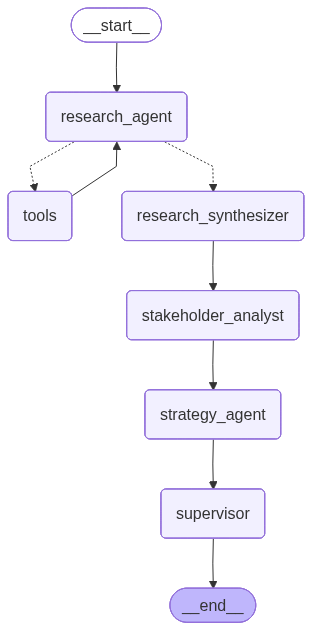

In [15]:
# Visualize the agent workflow
display(Image(strategic_agent.get_graph().draw_mermaid_png()))

## 🚀 Execute the Strategic Analysis
Run the full Question Decomposition Protocol workflow

In [16]:
# Define the initial challenge briefing
challenge_brief = """
### MOTEL ONE REPOSITIONING CHALLENGE

**Current Situation:**
- Loyalty Base: 90% Gen-X/Boomers (High reliability, high recurring revenue)
- Gen-Z Share: Only 3% of bookings
- Brand Perception (Gen-Z): "Where my parents stay" (Uncool, functional, boring)
- Brand Perception (Boomers): Reliable, good value, central locations

**The Challenge:**
- Objective: Capture Gen-Z travel spend (projected to be 35% of market by 2027)
- Revenue at Stake: €400M by 2028
- Budget: €8M over 18 months
- Critical Constraint: DO NOT alienate the existing 90% Boomer/Gen-X base

**Your Mission:**
Apply the Question Decomposition Protocol to solve the Intergenerational Brand Gap.
"""

print(challenge_brief)


### MOTEL ONE REPOSITIONING CHALLENGE

**Current Situation:**
- Loyalty Base: 90% Gen-X/Boomers (High reliability, high recurring revenue)
- Gen-Z Share: Only 3% of bookings
- Brand Perception (Gen-Z): "Where my parents stay" (Uncool, functional, boring)
- Brand Perception (Boomers): Reliable, good value, central locations

**The Challenge:**
- Objective: Capture Gen-Z travel spend (projected to be 35% of market by 2027)
- Revenue at Stake: €400M by 2028
- Budget: €8M over 18 months
- Critical Constraint: DO NOT alienate the existing 90% Boomer/Gen-X base

**Your Mission:**
Apply the Question Decomposition Protocol to solve the Intergenerational Brand Gap.



In [ ]:
# Execute the multi-agent strategic analysis
print("🚀 Initiating Strategic Analysis...\n")
print("=" * 60)

# Initialize state with the challenge
initial_state = {
    "messages": [HumanMessage(content=challenge_brief)],
    "research_data": "",
    "stakeholder_analysis": "",
    "strategic_angles": "",
    "current_phase": "start",
    "next_agent": "research_agent"
}

# Run the agent with streaming to see progress
final_result = None
for step in strategic_agent.stream(initial_state, stream_mode="updates"):
    for node_name, node_output in step.items():
        print(f"\n📍 Agent: {node_name.upper()}")
        print("-" * 40)
        
        if "messages" in node_output and node_output["messages"]:
            last_msg = node_output["messages"][-1]
            if hasattr(last_msg, 'content') and last_msg.content:
                # Print a preview of the output
                content_preview = last_msg.content[:500] + "..." if len(last_msg.content) > 500 else last_msg.content
                print(content_preview)
        
        if "current_phase" in node_output:
            print(f"\n✅ Phase: {node_output['current_phase']}")
    
    # Keep track of final result
    final_result = node_output

print("\n" + "=" * 60)
print("🎯 Strategic Analysis Complete!")

🚀 Initiating Strategic Analysis...


📍 Agent: RESEARCH_AGENT
----------------------------------------

✅ Phase: research

📍 Agent: RESEARCH_AGENT
----------------------------------------

✅ Phase: research

📍 Agent: TOOLS
----------------------------------------
Hotel digital transformation enhances guest experience through contactless check-ins, personalized services, and virtual tours, optimizing both guest satisfaction and operational efficiency. Successful examples include luxury hotels leveraging technology to maintain personal touch. Digital platforms boost guest engagement and staff efficiency.

📍 Agent: TOOLS
----------------------------------------
Hotel digital transformation enhances guest experience through contactless check-ins, personalized services, and virtual tours, optimizing both guest satisfaction and operational efficiency. Successful examples include luxury hotels leveraging technology to maintain personal touch. Digital platforms boost guest engagement and staff 

BadRequestError: Error code: 400 - {'error': {'message': "Invalid parameter: messages with role 'tool' must be a response to a preceeding message with 'tool_calls'.", 'type': 'invalid_request_error', 'param': 'messages.[1].role', 'code': None}}

## 📊 View Full Strategic Brief
Display the complete output from each phase

In [ ]:
# Get the final state by running invoke (to get complete state)
final_result = strategic_agent.invoke(initial_state)

# Display the final strategic brief
print("=" * 80)
print("📋 FINAL STRATEGIC BRIEF - MOTEL ONE REPOSITIONING")
print("=" * 80)
display(Markdown(final_result["messages"][-1].content))

In [ ]:
# View detailed research findings
print("=" * 80)
print("🔬 PHASE 1: MARKET RESEARCH FINDINGS")
print("=" * 80)
display(Markdown(final_result.get("research_data", "No research data available")))

In [ ]:
# View stakeholder analysis
print("=" * 80)
print("👥 PHASE 1: STAKEHOLDER ANALYSIS")
print("=" * 80)
display(Markdown(final_result.get("stakeholder_analysis", "No stakeholder analysis available")))

In [ ]:
# View strategic angles
print("=" * 80)
print("🎯 PHASE 2 & 3: STRATEGIC ANGLES")
print("=" * 80)
display(Markdown(final_result.get("strategic_angles", "No strategic angles available")))

## 💬 Interactive Mode
Chat with the strategic agent for follow-up questions

In [ ]:
# Interactive follow-up function
def ask_strategist(question: str, context: dict = None):
    """Ask follow-up questions about the strategic analysis"""
    if context is None:
        context = final_result
    
    follow_up_llm = ChatOpenAI(temperature=0.5, model="gpt-4o-mini")
    
    system_prompt = SystemMessage(content=f"""You are a Lead Strategist who has just completed 
    a comprehensive analysis for Motel One's repositioning challenge.
    
    You have the following context from your analysis:
    
    RESEARCH: {context.get('research_data', 'N/A')[:2000]}
    
    STAKEHOLDER ANALYSIS: {context.get('stakeholder_analysis', 'N/A')[:2000]}
    
    STRATEGIC ANGLES: {context.get('strategic_angles', 'N/A')[:2000]}
    
    Answer the user's follow-up question with specific, actionable insights based on your analysis.
    Be direct and strategic in your responses.
    """)
    
    response = follow_up_llm.invoke([system_prompt, HumanMessage(content=question)])
    return response.content

# Example usage
print("💬 Ask follow-up questions using: ask_strategist('your question here')")

In [ ]:
# Example follow-up question
response = ask_strategist("What would be the first 90-day action plan for implementing the recommended strategy?")
display(Markdown(response))